In [25]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import scipy
from math import exp
from sklearn.preprocessing import normalize #change to scale
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [26]:
# x_raw = pd.read_csv ("C:/Users/.../Dexter/dexter_train.csv",delimiter =",", header = None)
# y_raw = np.genfromtxt ("C:/Users/.../Dexter/dexter_train.labels")
# xt_raw = pd.read_csv ("C:/Users/.../Dexter/dexter_valid.csv",delimiter =",", header = None)
# yt_raw = np.genfromtxt ("C:/Users/.../Dexter/dexter_valid.labels")

x_raw = np.genfromtxt ("C:/Users/.../Gisette/gisette_train.data")
y_raw = np.genfromtxt ("C:/Users/.../Gisette/gisette_train.labels")
xt_raw = np.genfromtxt ("C:/Users/.../Gisette/gisette_valid.data")
yt_raw = np.genfromtxt ("C:/Users/.../Gisette/gisette_valid.labels")

# x_raw = np.genfromtxt ("C:/Users/.../Hill_valley/X.dat")
# y_raw = np.genfromtxt ("C:/Users/.../Hill_valley/Y.dat")
# xt_raw = np.genfromtxt ("C:/Users/.../Hill_valley/Xtest.dat")
# yt_raw = np.genfromtxt ("C:/Users/.../Hill_valley/Ytest.dat")

X_train = normalize(x_raw)
X_test = normalize(xt_raw)
y_train = np.where(y_raw == -1, 0, y_raw)
y_test = np.where(yt_raw == -1, 0, yt_raw)

Train a logistic regressor on the training set, starting with $W^{(0)} = 0$, with 300 gradient ascent iterations and shrinkage $\lambda = 0.001$ in
the update equation: 

$\begin{align} W^{(t+1)} \leftarrow W^{(t)} - \eta \lambda W^{(t)} - \frac{\eta}{N} \frac{\partial}{\partial W} L (W^{(t)}) \end{align}$

where $L (W^{(t)})$ is the negative log likelihood. Observe that there is an extra factor of $\frac{1}{N}$ in the loss term compared to the class notes.

Find a good learning rate $\eta$ such that the negative log-likelihood converges in at most 300 iterations and is monotonically decreasing. Plot the negative loglikelihood
vs iteration number. Report in a table the misclassification error on the training and test set.

In [27]:
class LogisticRegression:
    
    def __init__(self, learning_rate=.001, lamda=0.001, max_iter=300):
        self.learning_rate = learning_rate
        self.lamda = lamda
        self.W = None
        self.max_iter = max_iter
        self.X_train = None
        self.log_likelihood = np.empty(0)

	# def sigmoid(self, z):
	# 	sig_z = (1/(1+np.exp(-z)))
	# 	assert (z.shape==sig_z.shape)
	# 	return sig_z

    def predict_proba(self, X_test):
    	y_pred = []
    	for i in range(0, X_test.shape[0]):
    		z = np.dot(self.W, X_test[i])
    		y_pred.append(scipy.special.expit(z))
    	return y_pred

    def loss(self, y_pred, y_train):
    	loss = []
    	for i in range(0, y_train.shape[0]):
    		loss.append(-y_train[i]*np.log(y_pred[i]) - (1-y_train[i])*np.log(1 - y_pred[i]))
				#likelihood = -y_train*np.log(y_pred)-(1-y_train)*np.log(1-y_pred)
				#likelihood = sum(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))
    	J = np.sum(loss)
    	self.log_likelihood = np.append(self.log_likelihood, J)
    	return J

    def gradient_ascent(self, X_train, y_train, y_pred):
    	del_J = np.empty(0)
    	for k in range(0, self.W.shape[0]):
    		gradient = np.dot(X_train[:,k],(y_train - y_pred))
    		del_J = np.append(del_J, (self.learning_rate*gradient/X_train.shape[0]))
    	self.W = self.W - self.learning_rate*self.lamda*self.W + del_J
     	#self.weights = self.weights - 0.001*self.learning_rate*self.weights + (self.learning_rate/y.shape[0])*gradient
    	return

    def fit(self, X_train, y_train):
    	self.W = np.zeros(X_train.shape[1])
    	for iterations in range(self.max_iter):
            #Mi = k + (X_train.shape[1] - k)*np.max(0, (max_iter-2*i)/(2*i*mu+max_iter))
    		y_pred = self.predict_proba(X_train)
    		J = self.loss(y_pred, y_train)
    		# print("Cost: ",J)
    		self.gradient_ascent(X_train, y_train, y_pred)
    		# print(iterations)


    def predict(self, X_test):
    	y = []
    	y_pred = self.predict_proba(X_test)
    	for i in range(0, X_test.shape[0]):
    		if(y_pred[i] > 0.5):
    			y.append(0)
    		else:
    			y.append(1)
    	return y

    def scores(self, X_test, y_test):
    	y = self.predict(X_test)
    	mis_classification = 0
    	for i in range(0, len(y)):
    		if(y[i] != y_test[i]):
    			mis_classification += 1
    	score = mis_classification/len(y)
    	return score

TESTING SET EFFICIENCY
OURS:  0.941
SKLEARN:  0.965
TRAINING SET EFFICIENCY
OURS:  0.9408333333333333
SKLEARN:  0.9701666666666666


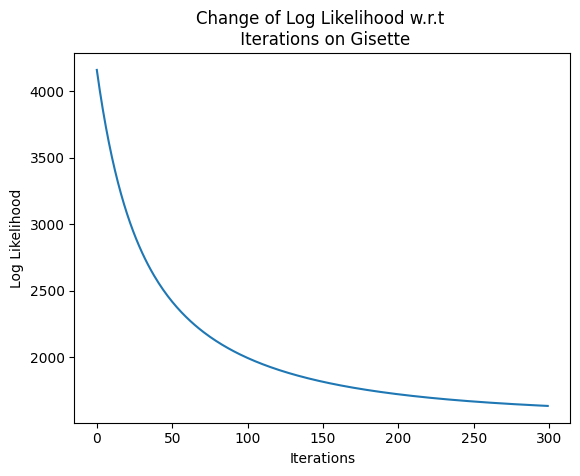

In [28]:
sklearn_model = linear_model.LogisticRegression()
sklearn_model.fit(X_train, y_train)

model = LogisticRegression(4, 0.001, 300)
model.fit(X_train, y_train)

print("TESTING SET EFFICIENCY")
print("OURS: ",model.scores(X_test, y_test))
print("SKLEARN: ", sklearn_model.score(X_test, y_test))
print("TRAINING SET EFFICIENCY")
print("OURS: ",model.scores(X_train, y_train))
print("SKLEARN: ", sklearn_model.score(X_train, y_train))


plt.plot(model.log_likelihood)

plt.xlabel('Iterations')
plt.ylabel('Log Likelihood')

plt.title("Change of Log Likelihood w.r.t \n Iterations on Gisette")

plt.show()